# To Contracept or Not to Contracept

Import packeges and py-files

In [1]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. packeges 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import copy

# c. import py-files 
from Model import child_model 
import Solve as solver
import Estimate as estimate

## Set up

### Read data

In [2]:
model = child_model()
dta = model.read_data()
dta.x.value_counts()



2    8038
1    6783
0    3617
3    1945
4     797
Name: x, dtype: int64

### State trantision conditional on age and choice from the real data

In [3]:
solver.P_list(model, dta)
model.p1_list



array([[0.48214286, 0.51785714],
       [0.41558442, 0.58441558],
       [0.54545455, 0.45454545],
       [0.5477707 , 0.4522293 ],
       [0.53403141, 0.46596859],
       [0.45247148, 0.54752852],
       [0.54179567, 0.45820433],
       [0.50867052, 0.49132948],
       [0.5026178 , 0.4973822 ],
       [0.55452436, 0.44547564],
       [0.55012225, 0.44987775],
       [0.55813953, 0.44186047],
       [0.60614525, 0.39385475],
       [0.66767372, 0.33232628],
       [0.7032967 , 0.2967033 ],
       [0.71370968, 0.28629032],
       [0.75877193, 0.24122807],
       [0.79187817, 0.20812183],
       [0.875     , 0.125     ],
       [0.90625   , 0.09375   ],
       [0.94326241, 0.05673759],
       [0.93129771, 0.06870229],
       [0.97087379, 0.02912621],
       [0.95789474, 0.04210526],
       [0.98461538, 0.01538462],
       [0.98461538, 0.01538462],
       [1.        , 0.        ]])

## Show that the estimating works on simulated data

### Solve the model and simulate data

In [4]:
# a. Solve model 
V, pnc = solver.BackwardsInduction(model)

# b. Simulate data
data = model.sim_data(pnc)


### Chosen parameters

In [5]:
print(model.mu, model.eta1, model.eta2) # we choose random parameters to check that the estimation works

0.4 0.8 -0.3


### Estimate parameters from simulated data

In [6]:
# a. Initialize parameters 
samplesize = data.shape[0]
par_mu = copy.copy(model.mu)
par_eta1 = copy.copy(model.eta1)
par_eta2 = copy.copy(model.eta2)

# b. Number of gridpoints (must be the same size)
I = 10

# c. Search grid 
log_lik = np.nan + np.zeros((I,I,I))
mu = np.linspace(0,0.9,I)
eta1 = np.linspace(0,0.9,I)
eta2 = np.linspace(-0.9,0,I)

# d. Loop over all parameter grids 
for i in range(I):
    for j in range(I):
        for k in range(I):
                # i. Estimate parameters
                pnames = ['eta1', 'eta2', 'mu']
                theta = np.array([eta1[i], eta2[j], mu[k]])
                # ii. Estimate log-likelihood in simulated data
                log_lik[i,j,k] = estimate.ll(theta, model, solver, data, pnames)

# e. Log-likelihood 
log_lik *= samplesize*(-1)

# f. Re-inset the true parameters 
model.eta1 = copy.copy(par_eta1)
model.eta2 = copy.copy(par_eta2)
model.mu = copy.copy(par_mu)

# g. Find the maximum log-likelihood
x, y, z = np.unravel_index(np.argmax(log_lik), log_lik.shape)

# h. Print results
print(mu[z], eta1[x], eta2[y])

0.4 0.8 -0.29999999999999993


## Estimate parameters on real-life data

In [8]:
# a. Initialize parameters 
samplesize = dta.shape[0]
par_mu = copy.copy(model.mu)
par_eta1 = copy.copy(model.eta1)
par_eta2 = copy.copy(model.eta2)

# b. Number of gridpoints
I = 40

# c. Search grid  
log_lik = np.nan + np.zeros((I,I,I))
mu = np.linspace(1,2,I) # bounds of the grid is chosen carefully after many run throughs of different bounds
eta1 = np.linspace(0,1, I) 
eta2 = np.linspace(-1,0,I)

# d. Loop over all parameter grids 
for i in range(I):
    for j in range(I):
        for k in range(I):
                
                # i. Estimate parameters
                pnames = ['eta1', 'eta2', 'mu']
                theta = np.array([eta1[i], eta2[j], mu[k]])
                # ii. Estimate log-likelihood in real data
                log_lik[i,j,k] = estimate.ll(theta, model, solver, dta, pnames)

# e. Log-likelihood 
log_lik *= samplesize*(-1)

# f. Re-inset the true parameters 
model.eta1 = copy.copy(par_eta1)
model.eta2 = copy.copy(par_eta2)
model.mu = copy.copy(par_mu)

# g. Find the maximum log-likelihood
x, y, z = np.unravel_index(np.argmax(log_lik), log_lik.shape)

# h. Print results
print(eta1[x], eta2[y], mu[z])

0.6153846153846154 -0.1282051282051282 1.205128205128205


In [9]:
#Print log-likelihood
log_lik[x,y,z]


-21118.15041477935

### Update parameters

In [10]:
model.mu = mu[z]
model.eta1 = eta1[x]
model.eta2 = eta2[y]

Plot utility function with updated parameters

1.205128205128205 0.6153846153846154 -0.1282051282051282


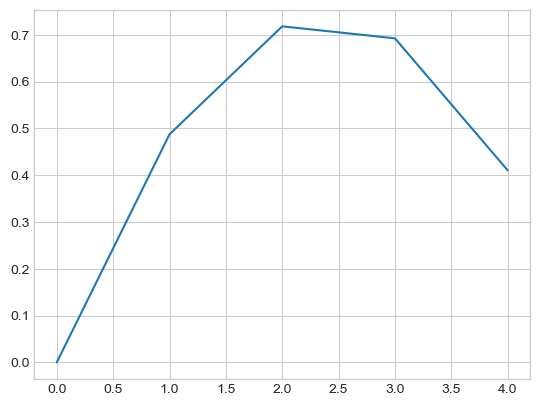

In [11]:
# a. Print new parameters
print(model.mu, model.eta1, model.eta2)
# b. Update grid
model.create_grid()
# c. Plot  utility
x= range(5)
fx = model.utility
plt.plot(x, fx)

### Solve the model and simulate data with true parameters

In [12]:
# a. Solve model
V, pnc = solver.BackwardsInduction(model)

# b. Simulate data
data = model.sim_data(pnc)

### Distribution of children

In [13]:
# a. Data in last period 
data0 = data[(data['t']==model.T-1)]

# b. Share of children 
data0.x.value_counts()/model.N*100

2    32.641921
3    32.168850
4    22.525473
1    11.681223
0     0.982533
Name: x, dtype: float64

### Choice probabilities

In [14]:
print(pnc)

[[0.359 0.437 0.388 0.401 0.41  0.471 0.438 0.469 0.491 0.474 0.502 0.513
  0.502 0.462 0.448 0.448 0.414 0.4   0.323 0.295 0.271 0.282 0.249 0.264
  0.242 0.242 1.   ]
 [0.254 0.272 0.265 0.269 0.273 0.29  0.284 0.295 0.305 0.303 0.314 0.322
  0.322 0.312 0.31  0.313 0.303 0.3   0.27  0.259 0.249 0.254 0.239 0.246
  0.236 0.236 1.   ]
 [0.185 0.168 0.181 0.178 0.176 0.166 0.175 0.171 0.171 0.177 0.177 0.181
  0.187 0.197 0.202 0.206 0.212 0.216 0.223 0.226 0.228 0.227 0.229 0.229
  0.23  0.23  1.   ]
 [0.169 0.143 0.158 0.153 0.149 0.131 0.141 0.132 0.127 0.133 0.127 0.126
  0.131 0.142 0.146 0.147 0.157 0.161 0.187 0.199 0.209 0.204 0.22  0.213
  0.224 0.224 1.   ]
 [0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231
  0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231
  0.231 0.231 1.   ]]


## Counter factuals

### Perfect contraceptive use

In [15]:
# a. Perfect contraceptive use 
model.p2_list = np.ones([model.T,2])*np.array([1, 0])

# b. Solve model
V_cf, pnc_cf = solver.BackwardsInduction(model)

# c. Simulate data
data_cf = model.sim_data(pnc_cf)

### Distrubution of children

In [16]:
# a. Data in last period
data_cf0 = data_cf[(data_cf['t']==model.T-1)]

# b. Share of children
data_cf0.x.value_counts()/model.N*100

2    39.192140
3    32.350801
1    15.720524
4    11.499272
0     1.237263
Name: x, dtype: float64

### Choice probabilities

In [17]:
print(pnc_cf)

[[0.471 0.521 0.45  0.45  0.46  0.521 0.474 0.507 0.528 0.508 0.53  0.547
  0.53  0.491 0.471 0.474 0.439 0.413 0.335 0.307 0.276 0.286 0.253 0.264
  0.242 0.242 1.   ]
 [0.299 0.314 0.295 0.295 0.299 0.319 0.306 0.319 0.328 0.324 0.334 0.344
  0.34  0.329 0.323 0.327 0.315 0.306 0.276 0.264 0.251 0.256 0.241 0.246
  0.236 0.236 1.   ]
 [0.168 0.162 0.175 0.175 0.174 0.166 0.175 0.172 0.173 0.179 0.181 0.184
  0.191 0.199 0.204 0.207 0.213 0.217 0.223 0.225 0.228 0.227 0.229 0.229
  0.23  0.23  1.   ]
 [0.121 0.108 0.129 0.128 0.125 0.109 0.123 0.115 0.111 0.118 0.114 0.113
  0.12  0.131 0.137 0.138 0.148 0.156 0.182 0.193 0.207 0.202 0.218 0.213
  0.224 0.224 1.   ]
 [0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231
  0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231 0.231
  0.231 0.231 1.   ]]


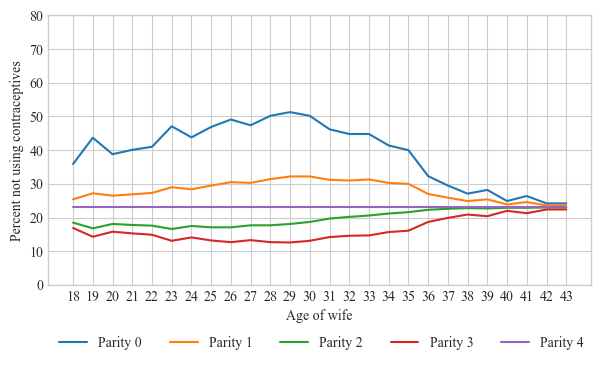

In [20]:
import pandas as pd

pnc_d = pd.DataFrame(pnc[:,0:-1])*100
new_columns = [str(int(col) + 18) for col in pnc_d.columns]
pnc_d = pnc_d.rename(columns=dict(zip(pnc_d.columns, new_columns)))

# pnc = pnc[:,0:-1]


plt.figure(figsize=(7, 3.5))  # Adjust the figure size as needed

for index, row in pnc_d.iterrows():
    plt.plot(row, label=f'Parity {index}')

plt.rcParams['font.family'] = 'Times New Roman'
plt.ylabel('Percent not using contraceptives')
plt.xlabel('Age of wife')
plt.ylim(0, 80)
plt.legend(ncol=5, loc=(0.01, -0.26), frameon=False)

plt.show()

# plt.savefig('Figure pnc.png', format = 'png',  bbox_inches='tight', dpi=1200)
# plt.close()

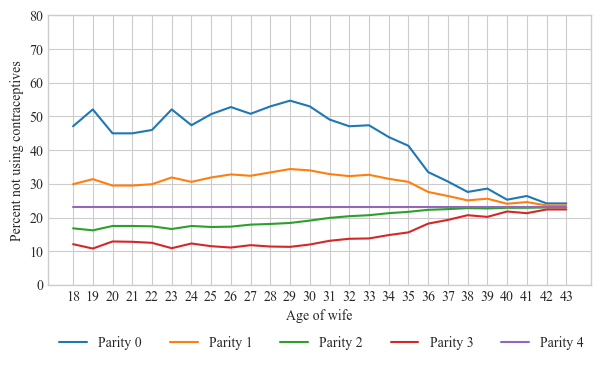

In [21]:
import pandas as pd

pnc_d = pd.DataFrame(pnc_cf[:,0:-1])*100
new_columns = [str(int(col) + 18) for col in pnc_d.columns]
pnc_d = pnc_d.rename(columns=dict(zip(pnc_d.columns, new_columns)))

# pnc = pnc[:,0:-1]


plt.figure(figsize=(7, 3.5))  # Adjust the figure size as needed

for index, row in pnc_d.iterrows():
    plt.plot(row, label=f'Parity {index}')

plt.rcParams['font.family'] = 'Times New Roman'
plt.ylabel('Percent not using contraceptives')
plt.xlabel('Age of wife')
plt.ylim(0, 80)
plt.legend(ncol=5, loc=(0.01, -0.26), frameon=False)

plt.show()

# plt.savefig('Figure pnc.png', format = 'png',  bbox_inches='tight', dpi=1200)
# plt.close()